In [66]:
from bs4 import BeautifulSoup
import urllib
from urllib.request import urlopen
from fake_useragent import UserAgent
from selenium import webdriver
import requests
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
#Function to extract information 
def scrapper_media(imdb_link):
        
        ua = UserAgent()
        response=requests.get(imdb_link, {"User-Agent": ua.random})
        soup=BeautifulSoup(response.text,'lxml')
        
        if(re.search('https://www.imdb.com',imdb_link)):
            
            #Name
            for j in soup.select('#title-overview-widget > div.vital > div.title_block > div > div.titleBar > div.title_wrapper')[:1]:
                if(j):
                    print('Name:'+j.text.strip()[:20]+"\n\n")
                    
                    
            #Storyline
            for j in soup.select('#titleStoryLine div:nth-child(3) p span'):
                if(j):
                    print('Storyline:\n'+j.text.strip()+"\n\n")
                
            #Rating
            for k in soup.select('#title-overview-widget div.vital div.title_block div div.ratings_wrapper div.imdbRating div strong span'):
                if(k):
                    print("Rating:"+k.text+"\n\n")
                
            #Number of Seasons
            for i in soup.select('#title-episode-widget > div > div:nth-child(4)'):
                k=i.find_all('a')
                if(k):
                    for j in k[:1]:
                        print("Number of Seasons: "+j.text.strip()+'\n')
                    
            #Number of Episodes    
            for k in soup.select('#title-overview-widget > div.vital > div.button_panel.navigation_panel > a > div > div > span'):
                if(k):
                    print("Number of episodes:"+k.text.strip()[:3]+"\n")
                    
                    
            #Episode Length
            for i in soup.select('#title-overview-widget > div.vital > div.title_block > div > div.titleBar > div.title_wrapper > div > time'):
                if(i):
                    print("Episode Length:"+i.text.strip()+"\n\n")
                
            #Poster    
            content=soup.find('div',class_='poster')
            if(content):
                co=content.find('a')
                co2=co.find('img')
                response = requests.get(co2['src'])
                img = Image.open(BytesIO(response.content))
                plt.imshow(img)
                
            #Genres        
            for k in soup.select('#title-overview-widget > div.vital > div.title_block > div > div.titleBar > div.title_wrapper > div'):
                if(k):
                    q=k.find_all('a')
                    print("Genres:\n")
                    for i in q[:-1]:
                        print(i.text)
                    print('\n')
                
            #Creators and Star Cast    
            content=soup.find('div',class_='plot_summary')
            if(content):
                for i in content.find_all('div',class_='credit_summary_item'):
                    j=i.find('h4')
                    if(j):
                        if((j.text.strip()=='Creator:')|(j.text.strip()=='Creators:')):
                            w=i.find_all('a')
                            print('Creator:')
                            for s in w:
                                if(s.text.strip()=='See full cast & crew'):
                                    break
                                else:
                                    print(s.text.strip())
                            print('\n')
                        elif(j.text.strip()=='Stars:'):
                            w=i.find_all('a')
                            print('Stars:')
                            for s in w:
                                if(s.text.strip()=='See full cast & crew'):
                                    break
                                else:
                                    print(s.text.strip())
                            print('\n')
                    else:
                        print('Not Available')
                
            
            #Release Data
            for i in soup.select('#titleDetails'):
                k=i.find_all('div',class_='txt-block')
                if(k):
                    for j in k[3:4]:
                        print(j.text.strip()[:40])
                    print('\n')
                
            #Trivia And Goofs    
            content=soup.find('div',id='titleDidYouKnow')
            if(content):
                trivia=content.find('div',id='trivia')
                if(trivia):
                    print("Trivia: "+trivia.text[7:-24].strip()+"\n")
                    
                goof=content.find('div',id="goofs")
                if(goof):
                    print('Goofs: '+goof.text[6:-24].strip()+"\n")
            
    
            #People also like    
            content3=soup.find('div',class_='rec_slide')
            if(content3):
                print('People also like: \n')
                for i in content3.find_all('div',class_='rec_item'):
                    j=i.find('a')
                    k=j.find('img')
                    print(k['alt'])
                print('\n\n')
            
            
            #Reviews    
            reviews=[]
            link2=imdb_link+'reviews?ref_=tt_urv'
            response2=requests.get(link2, {"User-Agent": ua.random})
            soup2=BeautifulSoup(response2.text,'lxml')
            content2=soup2.find('div',class_='lister-list')
            
            print('User Reviews: \n')
            if(content2):
                for i in content2.find_all('div',class_='review-container'):
                    j=i.find('div',class_='content')
                    print(j.text.strip())
                    reviews.append(j.text.strip())
            
            
            #Photos
            q=[]
            for i in soup.select('#titleImageStrip > div.mediastrip'):
                k=i.find_all('a')
                if(k):
                    for j in k:
                        a=j.find('img')
                        print(a['loadlate'])
                        q.append(a['loadlate'])

                else:
                    print('Not Available')
        else:
            print('Not Available')
    

In [3]:
def scrapper_star(imdb_link):
    
    ua = UserAgent()
    imdb_links=imdb_link[:-1]
    imdb_links2=imdb_links+'bio?ref_=nm_ov_bio_sm'
    response=requests.get(imdb_links2, {"User-Agent": ua.random})
    soup=BeautifulSoup(response.text,'lxml')
    response2=requests.get(imdb_links, {"User-Agent": ua.random})
    soup2=BeautifulSoup(response2.text,'lxml')
    
    if(re.search('https://www.imdb.com',imdb_links)):

        #Name and picture
        content=soup.find('div',class_='subpage_title_block name-subpage-header-block')
        if(content):
            a=content.find('a')
            im=a.find('img')
            k=im['src']
            response = requests.get(k)
            img = Image.open(BytesIO(response.content))
            plt.imshow(img)
                    
        #Title   
        title=content.find('div',class_='parent')
        if(title):
            print("Name: "+title.text.strip()+'\n')
          

        #Overview
        content2=soup.find('table',class_='dataTable labelValueTable')
        if(content2):
            for i in content2.find_all('tr'):
                #print(":")
                j=i.text.strip()
                j=j.replace('\n'," ").replace('    ',' ')
                print(j)
            print('\n\n')
            

        #Bio
        content3=soup.find('div',class_='soda odd')
        p=content3.find('p')
        if(p):
            print(p.text.strip())
            print('\n\n')
        
        #Spouse
        content4=soup.find('table',id='tableSpouses')
        if(content4):

            for i in content4.find_all('tr'):
                j=i.find('td')
                print("Spouse: "+j.text.strip()+"\n\n")

        #Known For
        content5=soup2.find('div',id='knownfor')
        if(content5):
            print('Known For: ')
            for i in content5.find_all('div',class_='knownfor-title'):
                j=i.find('div',class_='knownfor-title-role')
                k=j.find('a')
                print(k['title'])
            print('\n\n')


        #Awards Won
        link=imdb_links+'awards?ref_=nm_awd'
        response=requests.get(link, {"User-Agent": ua.random})
        soup4=BeautifulSoup(response.text,'lxml')
        content7=soup4.find('div',class_='article listo')
        if(content7):
            q=[]
            for i in content7.find_all('table',class_='awards'):
                a=i.find_all('tr')
                for j in a:
                    k=j.find_all('td')
                    row=[w.text for w in k]
                    q.append(row)
            df=pd.DataFrame(q)
            #print(q)
            df[0]=df[0].str.replace('\n','')
            df[1]=df[1].str.replace('\n',' ')
            df[2]=df[2].str.replace('\n',' ')
            df=df[df[1].str.contains('Winner',na=False)]
            df=df.reset_index()
            df.drop('index',axis=1,inplace=True)
            df.columns=['Year','Award',"Category"]
            df['Award']=df['Award'].apply(lambda x: x[7:])
            #print(df)
            with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
                print(df)

In [4]:
def link_extract(name):
    query = name
    
    query = urllib.parse.quote_plus(query) # Format into URL encoding
    number_result = 1
    ua = UserAgent()
    google_url = "https://www.google.com/search?q=" + query +"imdb"+"&num=" + str(number_result)
    response = requests.get(google_url, {"User-Agent": ua.random})
    soup = BeautifulSoup(response.text, "html.parser")
    result_div = soup.find_all('div', attrs = {'class': 'ZINbbc'})
    for r in result_div:
        # Checks if each element is present, else, raise exception
        try:
            link = r.find('a', href = True)
            title = r.find('div', attrs={'class':'vvjwJb'}).get_text()
            #description = r.find('div', attrs={'class':'s3v9rd'}).get_text()
            # Check to make sure everything is present before appending
            if link != '':
                imdb_links=link['href'][7:44]
                #print(imdb_links)
                #titles.append(title)
                #descriptions.append(description)
                # Next loop if one element is not present
                break
        except:
            continue
    return imdb_links


In [64]:
data_media={}
data_star={}

In [67]:
data_media = json.load(open("data_media.txt"))
data_star = json.load(open("data_star.txt"))

In [68]:
type(data_media)

dict

Media(m) or Star(s)s
Enter Name: jodie foster
Name: Jodie Foster

Born   November 19,  1962  in Los Angeles, California, USA
Birth NameAlicia Christian Foster
Nickname Jodie F
Height  5' 3" (1.6 m)



Jodie Foster started her career at the age of two. For four years she made commercials and finally gave her debut as an actress in the TV series Mayberry R.F.D. (1968). In 1975 Jodie was offered the role of prostitute Iris Steensma in the movie Taxi Driver (1976). This role, for which she received an Academy Award nomination in the "Best Supporting Actress" category, marked a breakthrough in her career. In 1980 she graduated as the best of her class from the College Lycée Français and began to study English Literature at Yale University, from where she graduated magna cum laude in 1985. One tragic moment in her life was March 30th, 1981 when John Warnock Hinkley Jr. attempted to assassinate the President of the United States, Ronald Reagan. Hinkley was obsessed with Jodie and the movieTax

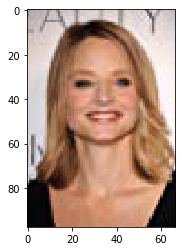

In [73]:
scrapper=input('Media(m) or Star(s)')
if(scrapper=='m'):
    name=input('Enter Name: ')
    imdb_link=link_extract(name)
    
    if(data_media.get(name)==None):
        imdb_link=link_extract(name)
        data_media[name]=imdb_link        
        scrapper_media(imdb_link)
    else:
        imdb_link=data_media[name]
        scrapper_media(imdb_link)
        
elif(scrapper=='s'):
    name=input('Enter Name: ')
    if(data_star.get(name)==None):
        imdb_link=link_extract(name)
        data_star[name]=imdb_link        
        scrapper_star(imdb_link)
    else:
        imdb_link=data_star[name]
        scrapper_star(imdb_link)
        
elif(scrapper=='e'):
    print('Bye..')
    #break
else:
    print('wrong input')
    #break

In [74]:
json.dump(data_media, open("data_media.txt",'w'))

json.dump(data_star, open("data_star.txt",'w'))

In [75]:
data_media

{'naruto': 'https://www.imdb.com/title/tt0409591/',
 'erased': 'https://www.imdb.com/title/tt5249462/'}

In [76]:
data_star

{'brad pitt': 'https://www.imdb.com/name/nm0000093/&',
 'jodie foster': 'https://www.imdb.com/name/nm0000149/&'}